In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt


In [33]:
covor=np.loadtxt('covmat_xxl_hiflugcs_xcop.txt')


In [130]:
xgrid_ext=np.loadtxt('radial_binning.txt')
mean_log=np.loadtxt('mean_pars.txt')
nsim=10000

In [131]:
profs=np.exp(np.random.multivariate_normal(mean_log,covor,size=nsim))

(array([2.130e+02, 1.210e+03, 1.798e+03, 1.765e+03, 1.490e+03, 1.032e+03,
        7.560e+02, 5.360e+02, 3.760e+02, 2.550e+02, 1.320e+02, 1.120e+02,
        8.100e+01, 6.800e+01, 5.100e+01, 3.100e+01, 2.900e+01, 1.700e+01,
        1.200e+01, 5.000e+00, 7.000e+00, 1.000e+00, 5.000e+00, 2.000e+00,
        6.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 3.000e+00]),
 array([ 0.29185389,  0.97657052,  1.66128714,  2.34600377,  3.03072039,
         3.71543701,  4.40015364,  5.08487026,  5.76958689,  6.45430351,
         7.13902013,  7.82373676,  8.50845338,  9.19317001,  9.87788663,
        10.56260325, 11.24731988, 11.9320365 , 12.61675313, 13.30146975,
        13.98618637, 14.670903  , 15.35561962, 16.04033625, 16.72505287,
        17.40976949, 18.09448612, 18.77920274, 19.46391937, 20.14863599,
        20.83335262]),
 <a list of 30 Patch objects>)

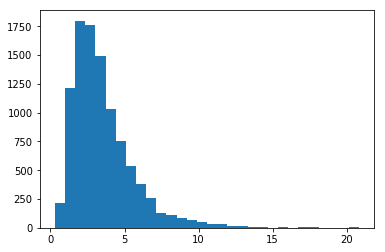

In [132]:
plt.hist(profs[:,len(mean_log)-1],bins=30)

In [139]:
allz=profs[:,len(mean_log)-3]
allkt=profs[:,len(mean_log)-1]
allm5=profs[:,len(mean_log)-2]


/home/deckert/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


<Figure size 432x288 with 0 Axes>

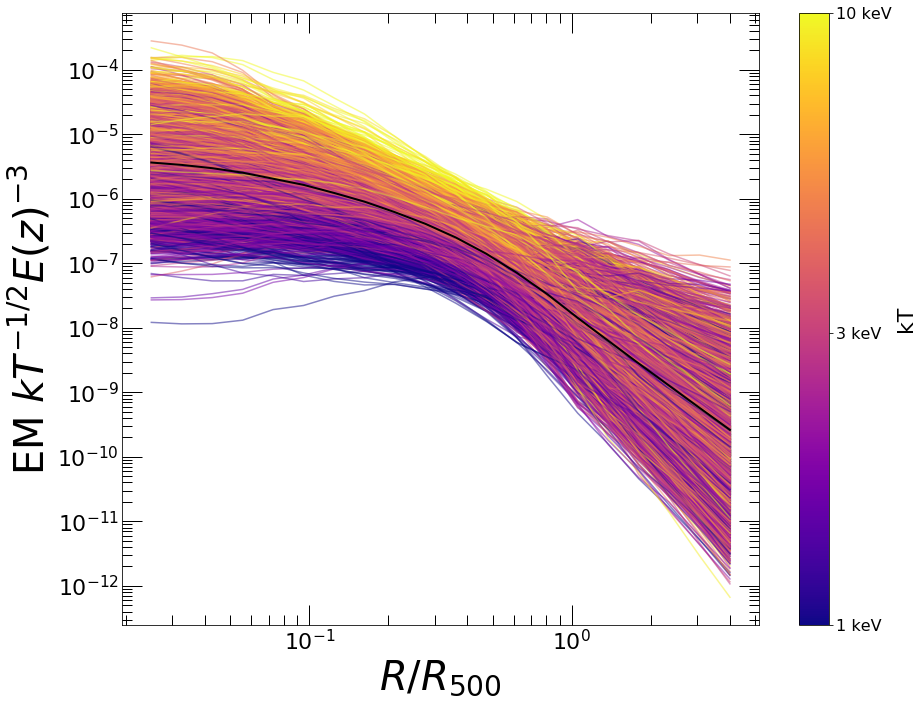

In [133]:
import matplotlib.cm as cm


cmap = plt.get_cmap('plasma')
mappable = cm.ScalarMappable(cmap=cmap)
mappable.set_array([])
#mappable.set_clim(np.min(np.log(allkt)),np.max(np.log(allkt)))
colorlog=True
if colorlog:
    mappable.set_clim(0.,np.log(10.))
else:
    mappable.set_clim(1.,10.)

lowkt=np.where(allkt<1.)
highkt=np.where(allkt>10.)
kt_col=np.copy(allkt)
kt_col[lowkt]=1.
kt_col[highkt]=10.

plt.clf()
fig=plt.figure(figsize=(13,10))
ax_size = [0.14, 0.12,
           0.85, 0.85]
ax = fig.add_axes(ax_size)
ax.minorticks_on()
ax.tick_params(length=20, width=1, which='major',direction='in',right='on',top='on')
ax.tick_params(length=10, width=1, which='minor',direction='in',right='on',top='on')
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.xscale('log')
plt.yscale('log')

for i in range(nsim):
    if colorlog:
        col=mappable.to_rgba(np.log(kt_col[i]))
    else:
        col=mappable.to_rgba(kt_col[i])
    plt.plot(xgrid_ext,profs[i,:len(xgrid_ext)],color=col,alpha=0.5)
    
if colorlog:
    cbar = plt.colorbar(mappable,ticks=[0.,np.log(3.),np.log(10.)])
else:
    cbar = plt.colorbar(mappable,ticks=[1.,3.,10.])

cbar.set_ticklabels([r'1 keV', r'3 keV', r'10 keV'])
cbar.set_label(r'kT', fontsize=22)
cbar.ax.tick_params(labelsize=16)

plt.plot(xgrid_ext,np.exp(mean_log)[:len(xgrid_ext)],color='black',linewidth=2)
plt.xlabel('$R/R_{500}$',fontsize=40)
plt.ylabel('EM $kT^{-1/2}E(z)^{-3}$',fontsize=40)
plt.savefig('simulation_profiles.pdf')

/home/deckert/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


Text(0, 0.5, 'EM $kT^{-1/2}(1+z)^{-9/2}$')

<Figure size 432x288 with 0 Axes>

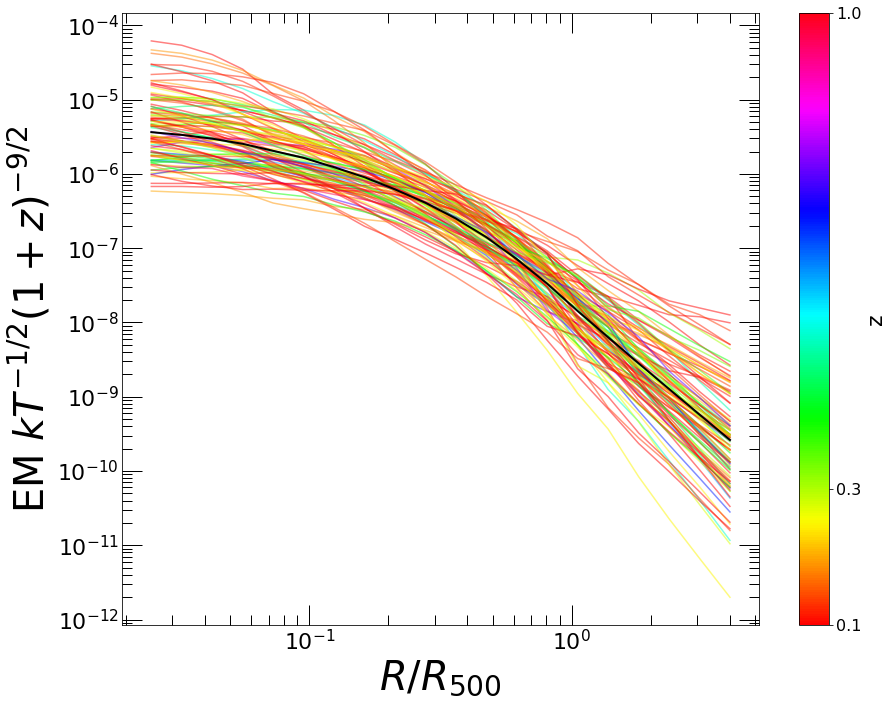

In [38]:

cmap = plt.get_cmap('hsv')
mappable = cm.ScalarMappable(cmap=cmap)
mappable.set_array([])
#mappable.set_clim(np.min(np.log(allkt)),np.max(np.log(allkt)))
colorlog=False
if colorlog:
    mappable.set_clim(np.log(0.1),np.log(1.))
else:
    mappable.set_clim(0.1,1.)


plt.clf()
fig=plt.figure(figsize=(13,10))
ax_size = [0.14, 0.12,
           0.85, 0.85]
ax = fig.add_axes(ax_size)
ax.minorticks_on()
ax.tick_params(length=20, width=1, which='major',direction='in',right='on',top='on')
ax.tick_params(length=10, width=1, which='minor',direction='in',right='on',top='on')
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.xscale('log')
plt.yscale('log')

for i in range(nsim):
    if colorlog:
        col=mappable.to_rgba(np.log(allz[i]))
    else:
        col=mappable.to_rgba(allz[i])
    plt.plot(xgrid_ext,profs[i,:len(xgrid_ext)],color=col,alpha=0.5)
    
if colorlog:
    cbar = plt.colorbar(mappable,ticks=[np.log(0.1),np.log(0.3),np.log(1.)])
else:
    cbar = plt.colorbar(mappable,ticks=[0.1,0.3,1.])

cbar.set_ticklabels([r'0.1', r'0.3', r'1.0'])
cbar.set_label(r'z', fontsize=22)
cbar.ax.tick_params(labelsize=16)

plt.plot(xgrid_ext,np.exp(mean_log)[:len(xgrid_ext)],color='black',linewidth=2)
plt.xlabel('$R/R_{500}$',fontsize=40)
plt.ylabel('EM $kT^{-1/2}(1+z)^{-9/2}$',fontsize=40)


(array([570., 233.,  82.,  43.,  26.,  18.,   5.,   5.,   6.,   2.,   4.,
          1.,   1.,   1.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([4.77300125e-03, 2.34547509e-01, 4.64322017e-01, 6.94096524e-01,
        9.23871032e-01, 1.15364554e+00, 1.38342005e+00, 1.61319456e+00,
        1.84296906e+00, 2.07274357e+00, 2.30251808e+00, 2.53229259e+00,
        2.76206709e+00, 2.99184160e+00, 3.22161611e+00, 3.45139062e+00,
        3.68116512e+00, 3.91093963e+00, 4.14071414e+00, 4.37048865e+00,
        4.60026316e+00, 4.83003766e+00, 5.05981217e+00, 5.28958668e+00,
        5.51936119e+00, 5.74913569e+00, 5.97891020e+00, 6.20868471e+00,
        6.43845922e+00, 6.66823372e+00, 6.89800823e+00]),
 <a list of 30 Patch objects>)

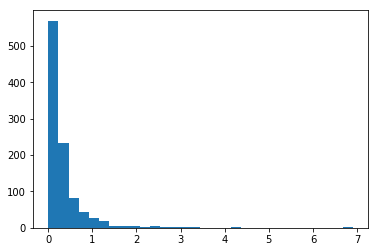

In [39]:
plt.hist(allz,bins=30)


In [40]:
print(allz)

[4.85842887e-01 1.14603229e+00 5.33632938e-02 4.59168038e-01
 4.16644156e-01 7.59900446e-01 6.08734684e-01 6.92158596e-01
 1.00481516e-01 2.00626750e-01 1.40625971e-01 4.16741381e-01
 1.13535418e-01 7.27945113e-02 1.20529886e-01 2.49695384e-01
 3.75644059e-02 1.30201811e-01 9.29010895e-02 4.49211351e-01
 1.30596612e-01 1.36741328e-02 9.55375168e-02 5.10386827e-01
 3.07862986e-01 5.23808120e-01 2.88858888e-02 1.97118880e-01
 1.89577724e-01 4.15390986e-01 2.77394834e-01 3.94252644e-02
 6.89800823e+00 3.43720323e-01 4.58033876e-02 4.68546848e-02
 3.66056764e-01 2.11212858e-01 4.68169867e-01 9.55263658e-02
 1.03761814e-01 5.76469882e-02 5.30785694e-01 7.15137533e-02
 1.32156605e-01 2.89166072e-01 1.19503382e-01 2.57285059e-01
 1.66200215e-01 1.34685929e-01 2.75153384e-01 6.18547879e-02
 1.21702858e-01 3.72129278e-01 3.32008406e-01 2.43410448e-01
 2.15786370e-01 1.63973555e-01 5.79499756e-02 7.18793967e-01
 1.19128050e-01 2.43451383e-01 7.99787247e-01 1.14138545e-01
 4.09353091e-01 2.864757

In [41]:
highz=np.where(allz>0.8)
print(allz[highz])

[1.14603229 6.89800823 0.97016789 1.21514005 1.24413649 1.20029097
 1.21513558 0.86392855 0.97261525 0.99878333 0.80729123 1.6303659
 0.83617526 0.85536398 1.25650436 0.98774102 2.27776881 1.01498822
 1.21576879 0.89226784 1.53154224 0.88620387 1.15949979 1.87750341
 1.07029023 0.96413048 1.00645336 1.43385861 1.10500065 2.3294445
 1.92261233 2.45000967 1.54430651 2.43408391 0.90070512 1.52701444
 1.30740582 0.82114592 1.7252106  1.05921168 1.0722702  0.99068282
 1.2428627  0.95369983 1.30842474 0.84530078 0.86474668 1.23419076
 1.06128635 3.03300551 2.65933472 1.03142291 0.9131362  1.80306327
 2.00782195 0.86513629 1.03465073 0.86404688 0.92967298 2.84860137
 0.87840251 0.84399674 2.36869443 3.3315721  1.28020013 1.12258985
 0.83311235 0.91718849 1.78301755 0.94358943 4.27188952 1.29839586
 1.26149522 1.12996866 1.30517715 1.19835754 1.08792571 1.35981817
 1.61106851 1.97041838 0.90037835 1.00376678 0.98037831 1.1283228
 0.90899314 1.1143046  0.83444268 2.03080514 2.15228696 1.6295582

In [43]:
print(allm5[highz])

[7.15465211e+13 8.14169072e+12 6.73289361e+13 2.73590936e+13
 1.00798182e+14 5.35638127e+13 4.28019360e+13 9.20255528e+13
 2.56710067e+14 2.75564209e+13 5.63783483e+14 2.51091179e+13
 1.83736742e+13 1.05519298e+14 9.05207434e+13 1.37726027e+14
 9.29399940e+13 4.20361695e+13 1.68183502e+14 3.35530048e+13
 6.82067832e+13 5.57178997e+13 6.74933756e+13 1.79882715e+14
 2.90802327e+14 1.23640711e+14 3.28413712e+13 8.54314610e+13
 3.98807664e+13 1.07358120e+13 5.30848345e+13 1.91404967e+13
 4.09351420e+13 1.63350158e+14 2.37126754e+14 8.87582486e+12
 2.99207356e+13 1.97248171e+13 5.52097757e+13 3.42597111e+13
 2.94513265e+13 1.45558373e+14 3.75356015e+13 7.04180695e+13
 6.11859109e+13 5.25150510e+13 5.18535171e+13 1.26729756e+13
 9.63061503e+13 7.47297804e+13 6.86682762e+12 1.75713077e+14
 1.22052520e+14 3.46382736e+13 5.22059270e+13 2.51307633e+13
 4.23170706e+13 6.62599511e+13 3.28097605e+13 4.56659537e+13
 7.82865643e+13 2.34782334e+14 7.59204689e+13 1.52493653e+13
 1.17287838e+14 6.128277

(array([  7.,  21.,  80., 164., 241., 222., 160.,  69.,  27.,   9.]),
 array([12.81703308, 13.07857174, 13.34011041, 13.60164908, 13.86318775,
        14.12472641, 14.38626508, 14.64780375, 14.90934241, 15.17088108,
        15.43241975]),
 <a list of 10 Patch objects>)

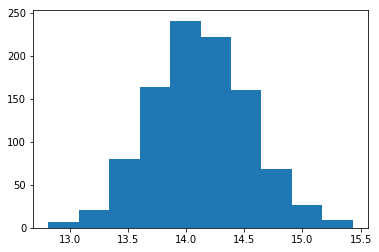

In [44]:
plt.hist(np.log10(allm5))

In [138]:
import astropy.units as u
from astropy.cosmology import *
cosmo = FlatLambdaCDM(
        H0=67.77 * u.km / u.s / u.Mpc,
        Om0=0.307115)  # , Ob0=0.048206)

eofz=cosmo.efunc(allz)

/home/deckert/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


8.846306258720883


<Figure size 432x288 with 0 Axes>

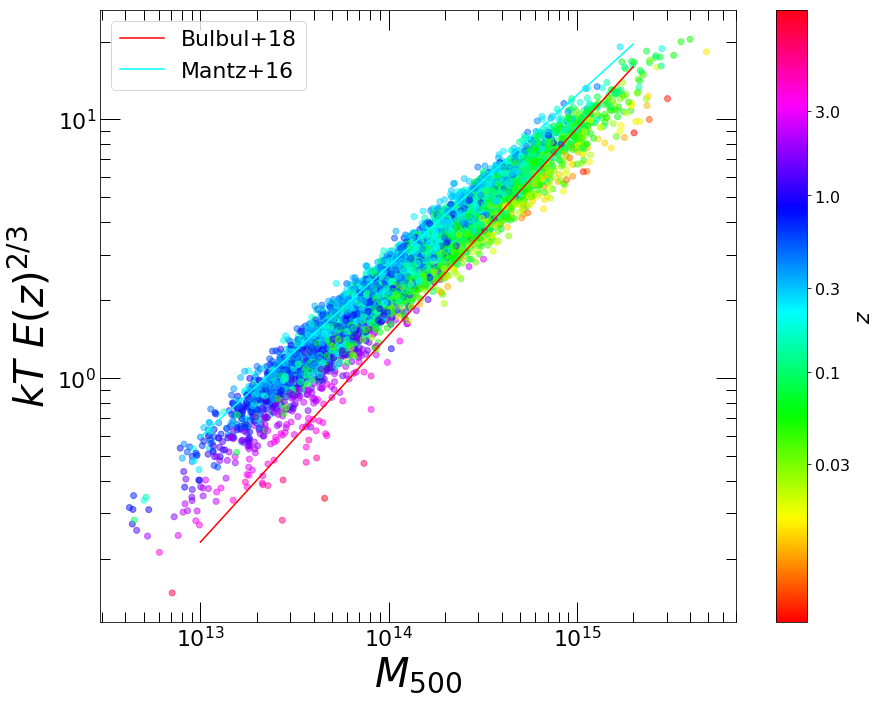

In [140]:
plt.clf()
fig=plt.figure(figsize=(13,10))
ax_size = [0.14, 0.12,
           0.85, 0.85]
ax = fig.add_axes(ax_size)
ax.minorticks_on()
ax.tick_params(length=20, width=1, which='major',direction='in',right='on',top='on')
ax.tick_params(length=10, width=1, which='minor',direction='in',right='on',top='on')
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.xscale('log')
plt.yscale('log')
colors=np.log(allz)
plt.scatter(allm5,allkt/np.power(eofz,2./3.),c=colors,cmap='hsv',alpha=0.5)


cmap = plt.get_cmap('hsv')
mappable = cm.ScalarMappable(cmap=cmap)
mappable.set_array([])
mappable.set_clim(np.min(np.log(allz)),np.max(np.log(allz)))
cbar = plt.colorbar(mappable,ticks=[np.log(0.03),np.log(0.1),np.log(0.3),np.log(1.),np.log(3.)])
cbar.set_ticklabels([r'$0.03$',r'$0.1$', r'$0.3$', r'$1.0$', r'$3.0$'])
cbar.set_label(r'$z$', fontsize=22)
cbar.ax.tick_params(labelsize=16)

plt.xlabel('$M_{500}$',fontsize=40)
plt.ylabel('$kT$ $E(z)^{2/3}$',fontsize=40)

x=np.logspace(13.,15.3,100)
y=6.41*np.power(x/6.35e14,0.799)
plt.plot(x,y,color='red',label='Bulbul+18')
print(np.exp(2.18))
mantz=np.exp(2.18)*np.power(x/6e14,0.66)
plt.plot(x,mantz,color='cyan',label='Mantz+16')

plt.legend(fontsize=22)
plt.savefig('simulated_M_T.pdf')

/home/deckert/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

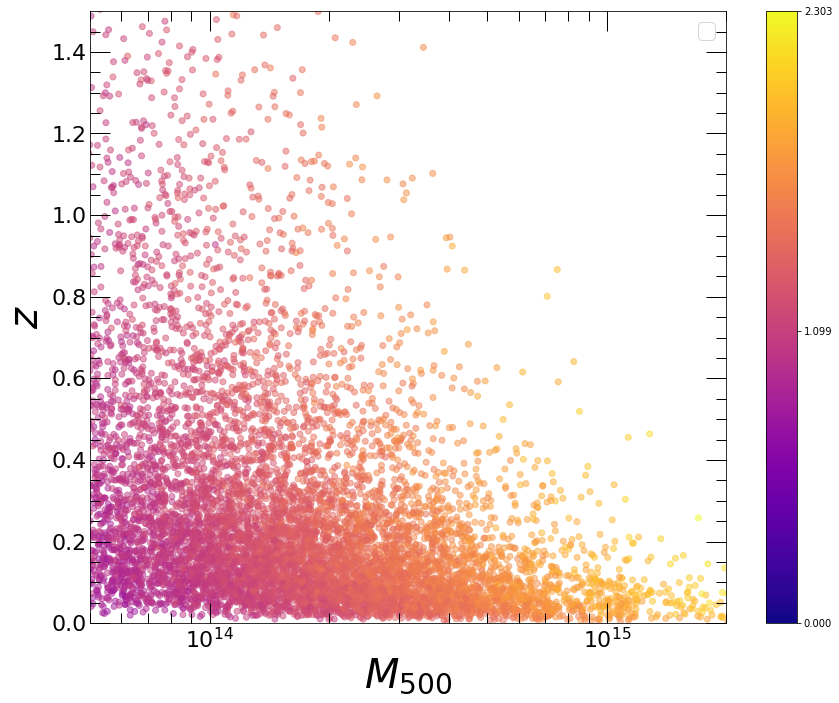

In [145]:
plt.clf()
fig=plt.figure(figsize=(13,10))
ax_size = [0.14, 0.12,
           0.85, 0.85]
ax = fig.add_axes(ax_size)
ax.minorticks_on()
ax.tick_params(length=20, width=1, which='major',direction='in',right='on',top='on')
ax.tick_params(length=10, width=1, which='minor',direction='in',right='on',top='on')
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.xscale('log')
#plt.yscale('log')

colors = np.log(allkt)
cmap = plt.get_cmap('plasma')
mappable = cm.ScalarMappable(cmap=cmap)
mappable.set_array([])
#mappable.set_clim(np.min(np.log(allkt)),np.max(np.log(allkt)))
colorlog=True
if colorlog:
    mappable.set_clim(0.,np.log(10.))
else:
    mappable.set_clim(1.,10.)

plt.scatter(allm5,allz,c=colors,cmap=cmap,alpha=0.5)

cbar.set_ticklabels([r'1 keV', r'3 keV', r'10 keV'])
cbar.set_label(r'kT', fontsize=22)
cbar.ax.tick_params(labelsize=16)
if colorlog:
    cbar = plt.colorbar(mappable,ticks=[0.,np.log(3.),np.log(10.)])
else:
    cbar = plt.colorbar(mappable,ticks=[1.,3.,10.])

plt.xlabel('$M_{500}$',fontsize=40)
plt.ylabel('$z$',fontsize=40)
plt.axis([5e13,2e15,0.,1.5])
plt.legend(fontsize=22)

/home/deckert/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


<Figure size 432x288 with 0 Axes>

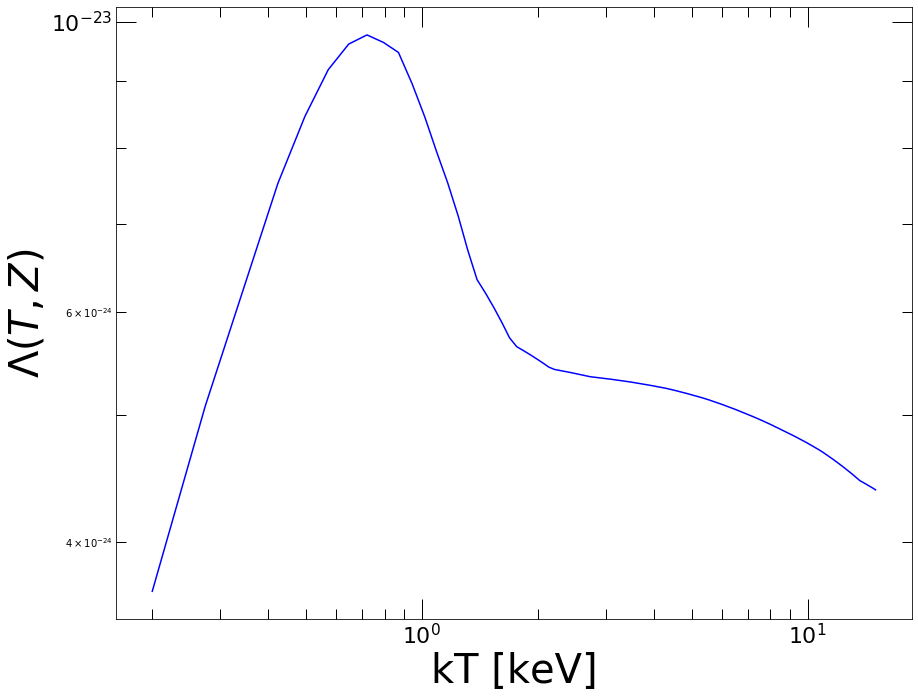

In [66]:
coolfunc=np.loadtxt('coolfunc.dat')
plt.clf()
fig=plt.figure(figsize=(13,10))
ax_size = [0.14, 0.12,
           0.85, 0.85]
ax = fig.add_axes(ax_size)
ax.minorticks_on()
ax.tick_params(length=20, width=1, which='major',direction='in',right='on',top='on')
ax.tick_params(length=10, width=1, which='minor',direction='in',right='on',top='on')
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.xlabel('kT [keV]',fontsize=40)
plt.ylabel('$\Lambda(T,Z)$',fontsize=40)
plt.plot(coolfunc[:,0],coolfunc[:,1],color='blue')
plt.xscale('log')
plt.yscale('log')

In [68]:
testprof=profs[0][:len(xgrid_ext)]
tlambda=np.interp(allkt[0],coolfunc[:,0],coolfunc[:,1])
print(tlambda)

5.37451414377945e-24


<p><b>Computing Lx,500 from ScEM(r)</b></p>

<p>
We have

$$ L_{X,500} = \int_0^{R_{500}} 2\pi r \, \Lambda(T,Z) \, EI(r) \, dr$$

with

$$ EI(r) = \int_{-\infty}^{\infty} n_e n_H\, d\ell = ScEM \left(\frac{kT}{10 keV}\right)^{1/2}E(z)^3$$

Making the substitution $r^\prime=r/R_{500}$, we find
$$ L_{X,500} = 2\pi\Lambda R_{500}^2 \int_0^1 EI(r^\prime)\,r^\prime\,dr^\prime$$
</p>


In [105]:
Mpc=3.0856776e+24
msun=1.98892e33

ez2=cosmo.efunc(allz[0])**2
#nfmekal=1e-14/(4.*np.pi*(1.+zxxl[i])*(1.+zxxl[i]))
transf=(60.*180./np.pi)**2/Mpc # conversion from EM to emission integral
resfact=np.sqrt(allkt[0]/10.0)*np.power(ez2,3./2.)
testprof_em=testprof*resfact # emission integral
ad=cosmo.angular_diameter_distance(allz[0]).value*Mpc

rhoc = cosmo.critical_density(allz[0]).value
r500 = np.power(allm5[0]*msun/4.*3./np.pi/500./rhoc,1./3.)
print(r500)
print(r500/Mpc*1e3)
print(testprof_em*xgrid_ext*(r500/Mpc)**2*2.*np.pi*tlambda*Mpc**3)

dx=np.empty(len(xgrid_ext))
dx[0]=xgrid_ext[0]
dx[1:len(xgrid_ext)]=(np.roll(xgrid_ext,-1)-xgrid_ext)[:len(xgrid_ext)-1]
print(dx)
print(xgrid_ext)

1.7553931697487942e+24
568.8841795230954
[3.76592313e+43 4.31044750e+43 4.63323661e+43 4.76186888e+43
 4.16403003e+43 4.26416640e+43 3.88825990e+43 3.35043737e+43
 2.85931491e+43 2.66413415e+43 2.35037946e+43 1.84798447e+43
 1.26312233e+43 9.17738112e+42 4.54045704e+42 3.81541735e+42
 2.26388718e+42 1.52371117e+42 8.93660189e+41 5.86266742e+41]
[0.025      0.00765475 0.00999855 0.01306001 0.01705885 0.0222821
 0.02910465 0.0380162  0.04965638 0.06486066 0.08472034 0.11066085
 0.14454408 0.18880201 0.24661128 0.32212116 0.4207514  0.54958122
 0.71785742 0.9376581 ]
[0.025      0.03265475 0.0426533  0.05571331 0.07277216 0.09505426
 0.12415891 0.16217511 0.21183149 0.27669215 0.36141249 0.47207334
 0.61661742 0.80541943 1.05203071 1.37415187 1.79490326 2.34448448
 3.0623419  4.        ]


In [106]:
lxcum=np.cumsum(testprof_em*xgrid_ext*r500**2*2.*np.pi*tlambda*Mpc*dx)
print(lxcum)

[9.41480783e+41 1.27143463e+42 1.73469126e+42 2.35659175e+42
 3.06692745e+42 4.01707323e+42 5.14873776e+42 6.42244681e+42
 7.84227906e+42 9.57025404e+42 1.15615035e+43 1.36064987e+43
 1.54322673e+43 1.71649753e+43 1.82847032e+43 1.95137299e+43
 2.04662636e+43 2.13036666e+43 2.19451872e+43 2.24949050e+43]


In [107]:
lx_500=np.interp(1.,xgrid_ext,lxcum)
print(lx_500/ez2)

1.0614704558942933e+43


In [91]:
print(tlambda*Mpc**3)

1.5790317174346237e+50


In [108]:
def calc_lx(prof,kt,m5,z):
    ez2=cosmo.efunc(z)**2
    rhoc = cosmo.critical_density(z).value
    r500 = np.power(m5*msun/4.*3./np.pi/500./rhoc,1./3.)
    resfact=np.sqrt(kt/10.0)*np.power(ez2,3./2.)
    prof_em=prof*resfact # emission integral
    tlambda=np.interp(kt,coolfunc[:,0],coolfunc[:,1]) # cooling function
    dx=np.empty(len(xgrid_ext))
    dx[0]=xgrid_ext[0]
    dx[1:len(xgrid_ext)]=(np.roll(xgrid_ext,-1)-xgrid_ext)[:len(xgrid_ext)-1]
    lxcum=np.cumsum(prof_em*xgrid_ext*r500**2*2.*np.pi*tlambda*Mpc*dx) # riemann integral
    lx_500=np.interp(1.,xgrid_ext,lxcum) # evaluated at R500
    return lx_500

In [112]:
calc_lx(testprof,allkt[0],allm5[0],allz[0])

1.804846001448024e+43

In [123]:
alllx=np.empty(nsim)
for i in range(nsim):
    tprof=profs[i,:len(xgrid_ext)]
    alllx[i]=calc_lx(tprof,allkt[i],allm5[i],allz[i])

/home/deckert/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


<Figure size 432x288 with 0 Axes>

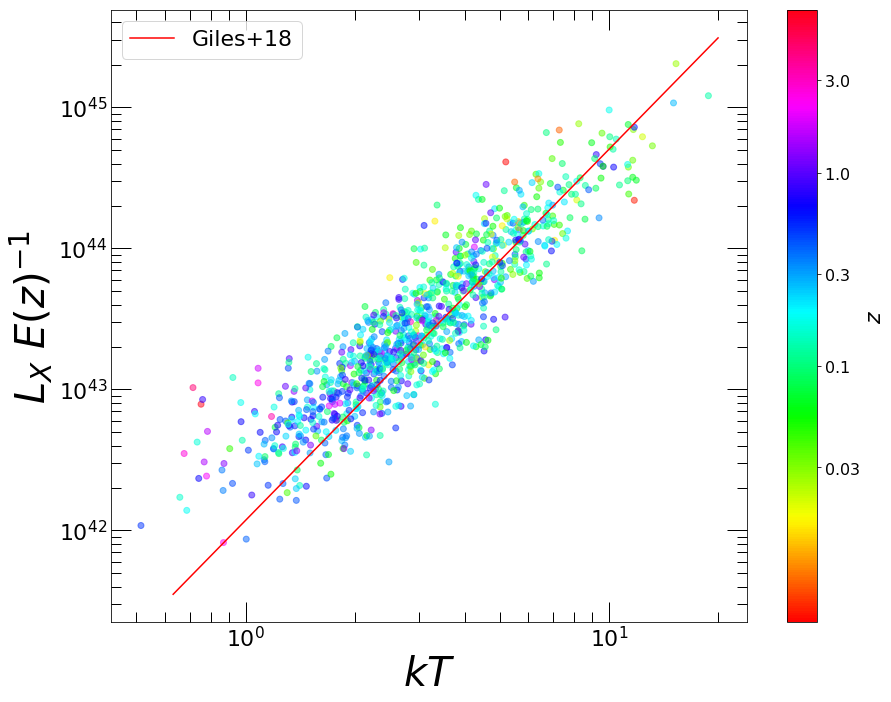

In [129]:
plt.clf()
fig=plt.figure(figsize=(13,10))
ax_size = [0.14, 0.12,
           0.85, 0.85]
ax = fig.add_axes(ax_size)
ax.minorticks_on()
ax.tick_params(length=20, width=1, which='major',direction='in',right='on',top='on')
ax.tick_params(length=10, width=1, which='minor',direction='in',right='on',top='on')
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.xscale('log')
plt.yscale('log')
colors=np.log(allz)
plt.scatter(allkt,alllx/eofz,c=colors,cmap='hsv',alpha=0.5)


cmap = plt.get_cmap('hsv')
mappable = cm.ScalarMappable(cmap=cmap)
mappable.set_array([])
mappable.set_clim(np.min(np.log(allz)),np.max(np.log(allz)))
cbar = plt.colorbar(mappable,ticks=[np.log(0.03),np.log(0.1),np.log(0.3),np.log(1.),np.log(3.)])
cbar.set_ticklabels([r'$0.03$',r'$0.1$', r'$0.3$', r'$1.0$', r'$3.0$'])
cbar.set_label(r'$z$', fontsize=22)
cbar.ax.tick_params(labelsize=16)

plt.xlabel('$kT$',fontsize=40)
plt.ylabel('$L_X$ $E(z)^{-1}$',fontsize=40)

x=np.logspace(-0.2,1.3,100)
y=3e43*0.71*np.power(x/3.,2.63)
plt.plot(x,y,color='red',label='Giles+18')
#print(np.exp(2.18))
#mantz=np.exp(2.18)*np.power(x/6e14,0.66)
#plt.plot(x,mantz,color='cyan',label='Mantz+16')

plt.legend(fontsize=22)
plt.savefig('Simulated_Lx_T.pdf')

In [120]:
allz

array([4.85842887e-01, 1.14603229e+00, 5.33632938e-02, 4.59168038e-01,
       4.16644156e-01, 7.59900446e-01, 6.08734684e-01, 6.92158596e-01,
       1.00481516e-01, 2.00626750e-01, 1.40625971e-01, 4.16741381e-01,
       1.13535418e-01, 7.27945113e-02, 1.20529886e-01, 2.49695384e-01,
       3.75644059e-02, 1.30201811e-01, 9.29010895e-02, 4.49211351e-01,
       1.30596612e-01, 1.36741328e-02, 9.55375168e-02, 5.10386827e-01,
       3.07862986e-01, 5.23808120e-01, 2.88858888e-02, 1.97118880e-01,
       1.89577724e-01, 4.15390986e-01, 2.77394834e-01, 3.94252644e-02,
       6.89800823e+00, 3.43720323e-01, 4.58033876e-02, 4.68546848e-02,
       3.66056764e-01, 2.11212858e-01, 4.68169867e-01, 9.55263658e-02,
       1.03761814e-01, 5.76469882e-02, 5.30785694e-01, 7.15137533e-02,
       1.32156605e-01, 2.89166072e-01, 1.19503382e-01, 2.57285059e-01,
       1.66200215e-01, 1.34685929e-01, 2.75153384e-01, 6.18547879e-02,
       1.21702858e-01, 3.72129278e-01, 3.32008406e-01, 2.43410448e-01,
      